# Artificial Neural Networks for waves decomposition (or discrete integral transform)

This project aims to use ANNs as a no-brainer for the decomposition of different types of waves, that is, waves described by several functions other than just sine and cosine.

In the case of complex exponentials, this can be seen as a way to obtain a Discrete Fourier Transform without the proper FFT methods. For Bessel functions, this would be equivalent to a Discrete Henkel Transform.

The approach to ANN trained from FFT I saw functionally is from [@endolith](https://gist.github.com/endolith/98863221204541bf017b6cae71cb0a89), from which I used part of the code.

This method is no way intended to be faster or more efficient than FFT, but more flexible and easy to expando to different types of waves.

As a disclaimer, i'm new at GitHub and these calculations are still being made, so if you find something incomplete, it will be done in due time.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [70]:
N=32; batch=10000;

In [96]:
pos=np.arange(N);A=np.random.randn(batch, N) + 1j*np.random.randn(batch, N);K=np.random.randint(0, N, size=(batch, N));x=np.arange(N);

In [97]:
expo=np.zeros((batch, N), dtype='complex128');
for j in range(batch):
    for i in pos:
        expo[j]+=A[j][i]*np.exp(K[j][i]*1j*2*np.pi*(x)/N)

In [98]:
ft=np.zeros_like(K, dtype='complex128');
for j in range(batch):
    for i in pos:
        ft[j][K[j][i]]+=(A[j][i])*N

In [99]:
X = np.hstack([expo.real, expo.imag])
Y = np.hstack([ft.real, ft.imag])

In [100]:
model = keras.Sequential([layers.Dense(N*2, input_dim=N*2, use_bias=False)])
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X, Y, epochs=100, batch_size=100)

Train on 10000 samples
Epoch 1/100
10000/10000 [==============================] - 0s 48us/sample - loss: 959.4000
Epoch 2/100
10000/10000 [==============================] - 0s 18us/sample - loss: 785.1089
Epoch 3/100
10000/10000 [==============================] - 0s 18us/sample - loss: 636.7454
Epoch 4/100
10000/10000 [==============================] - 0s 18us/sample - loss: 511.6430
Epoch 5/100
10000/10000 [==============================] - 0s 18us/sample - loss: 407.0461
Epoch 6/100
10000/10000 [==============================] - 0s 17us/sample - loss: 320.4333
Epoch 7/100
10000/10000 [==============================] - 0s 17us/sample - loss: 249.4349
Epoch 8/100
10000/10000 [==============================] - 0s 17us/sample - loss: 191.8537
Epoch 9/100
10000/10000 [==============================] - 0s 17us/sample - loss: 145.7146
Epoch 10/100
10000/10000 [==============================] - 0s 17us/sample - loss: 109.1995
Epoch 11/100
10000/10000 [==============================] - 0s 17u

In [ ]:
data = np.arange(N)

In [22]:
def ANN_DFT(x):
    if len(x) != N:
        raise ValueError(f'Input must be length {N}')
    pred = model.predict(np.hstack([x.real, x.imag])[np.newaxis])[0]
    result = pred[:N] + 1j*pred[N:]
    return result

In [ ]:
ANN = ANN_DFT(data)
FFT = np.fft.fft(data)
print(f'ANN matches FFT: {np.allclose(ANN, FFT)}')

In [ ]:
plt.plot(abs(ANN))
plt.show

In [ ]:
plt.plot(abs(FFT))
plt.show

In [ ]:
seno=[7*np.sin(3.5*2*np.pi*x/32) for x in data]

In [ ]:
sena=np.array(seno)
ANN = ANN_DFT(sena)
FFT = np.fft.fft(sena)
print(f'ANN matches FFT: {np.allclose(ANN, FFT, rtol=1e-05, atol=1e-05)}')

## Sine series

Now that we succesfully started with the best known example, the Fourier Transform, we go to a simpler case, Sine series.

The only changes now are that we will only deal with Real entries (no " dtype='complex128' " specification needed).

In [2]:
N=32; batch=10000;

In [72]:
pos=np.arange(N);A=np.random.uniform(-50, 50, size=(batch, N));K=np.random.randint(0, N, size=(batch, N));x=np.arange(N);

In [74]:
sine=np.zeros((batch, N));
for j in range(batch):
    for i in pos:
        sine[j]+=A[j][i]*np.sin((K[j][i])*np.pi*(x)/N)

In [75]:
st=np.zeros_like(K);
for j in range(batch):
    for i in pos:
        st[j][K[j][i]]+=(A[j][i])

In [95]:
model = keras.Sequential([layers.Dense(N, input_dim=N, use_bias=True)])
model.compile(loss='huber_loss', optimizer='adam')
model.fit(sine, st, epochs=40, batch_size=100)

Train on 10000 samples
Epoch 1/40
10000/10000 [==============================] - 1s 59us/sample - loss: 75.2960
Epoch 2/40
10000/10000 [==============================] - 0s 24us/sample - loss: 41.9212
Epoch 3/40
10000/10000 [==============================] - 0s 23us/sample - loss: 13.4149
Epoch 4/40
10000/10000 [==============================] - 0s 24us/sample - loss: 1.0129
Epoch 5/40
10000/10000 [==============================] - 0s 22us/sample - loss: 0.6782
Epoch 6/40
10000/10000 [==============================] - 0s 25us/sample - loss: 0.6805
Epoch 7/40
10000/10000 [==============================] - 0s 24us/sample - loss: 0.6811
Epoch 8/40
10000/10000 [==============================] - 0s 24us/sample - loss: 0.68310s - loss: 0.6
Epoch 9/40
10000/10000 [==============================] - 0s 23us/sample - loss: 0.6842
Epoch 10/40
10000/10000 [==============================] - 0s 24us/sample - loss: 0.6848
Epoch 11/40
10000/10000 [==============================] - 0s 23us/sample - los

In [88]:
model = keras.Sequential([layers.Dense(N, input_dim=N, use_bias=True)])
model.compile(loss='mean_squared_logarithmic_error', optimizer='adam')
model.fit(sine, st, epochs=40, batch_size=100)

Train on 10000 samples
Epoch 1/40
10000/10000 [==============================] - 1s 72us/sample - loss: 7.7898
Epoch 2/40
10000/10000 [==============================] - 0s 20us/sample - loss: 6.4760
Epoch 3/40
10000/10000 [==============================] - 0s 20us/sample - loss: 5.0525
Epoch 4/40
10000/10000 [==============================] - 0s 21us/sample - loss: 3.4735
Epoch 5/40
10000/10000 [==============================] - 0s 20us/sample - loss: 1.7132
Epoch 6/40
10000/10000 [==============================] - 0s 20us/sample - loss: 0.4358
Epoch 7/40
10000/10000 [==============================] - 0s 21us/sample - loss: 0.1979
Epoch 8/40
10000/10000 [==============================] - 0s 21us/sample - loss: 0.1501
Epoch 9/40
10000/10000 [==============================] - 0s 21us/sample - loss: 0.1337
Epoch 10/40
10000/10000 [==============================] - 0s 23us/sample - loss: 0.1191
Epoch 11/40
10000/10000 [==============================] - 0s 22us/sample - loss: 0.1096
Epoch 1

In [92]:
cosseno=[30*np.sin(9*np.pi*x/N) for x in pos]

cossena=np.array([cosseno])
pred=model.predict(cossena)
max(pred[0])

29.500185

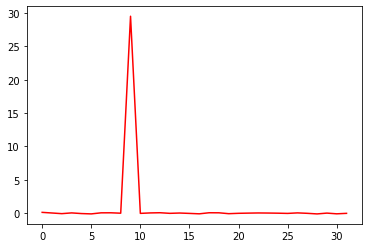

In [93]:
#plt.plot(cossena[0], 'blue')
plt.plot(pred[0], 'red')
plt.show;